<b><font size=3> Programming exercise 3 | Multi-class Classification and Neural Networks </b></font>

In this exercise, we will implement one-vs-all logistic regression and neural networks to recognize hand-written digits. 

<b> 1 | Multi-class Classification </b>

<b> 1.1 | Dataset </b>

In [43]:
import os
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

from scipy.io import loadmat
from scipy.optimize import minimize

In [44]:
os.chdir('/Users/christinakouride/Documents/Python/Learning/Andrew Ng - ML course/ex3')

data = scipy.io.loadmat('ex3data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [45]:
weights = scipy.io.loadmat('ex3weights.mat')
weights.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [46]:
#Y is a classification for each image. 1-10, where "10" is the handwritten "0"
Y = data['y']
print("Y shape: ",Y.shape," Unique elements in Y: ",np.unique(Y))

Y shape:  (5000, 1)  Unique elements in Y:  [ 1  2  3  4  5  6  7  8  9 10]


In [47]:
#X is 5000 images. Each image is a row. Each image has 400 pixels unrolled (20x20)
X = data['X']
print("X shape: ",X.shape)

#add intercept
X = np.column_stack((np.ones(len(data['X'])), data['X']))

X shape:  (5000, 400)


In [48]:
theta1, theta2 = weights['Theta1'], weights['Theta2']
print("Theta 1 shape: ",theta1.shape,"Theta 2 shape: ",theta2.shape)

Theta 1 shape:  (25, 401) Theta 2 shape:  (10, 26)


<b> 1.2 | Visualizing the data </b>

In [49]:
m, n = X.shape
nrow, ncol = 10,10

examples = X[:, 1:][np.random.randint(m, size=nrow * ncol)]

In [50]:
def displayData(examples, nrow, ncol):
    
    n = examples.shape[1]
    fig = plt.figure(figsize=(8, 8))

    gs = gridspec.GridSpec(nrow, ncol)

    k = 0
    for i in range(nrow):
        for j in range(ncol):
            ax = plt.subplot(gs[i, j])
            ax.axis('off')
            ax.imshow(examples[k].reshape(int(np.sqrt(n)), int(np.sqrt(n))).T,
                cmap=plt.get_cmap('Greys'), interpolation='nearest')
            k += 1

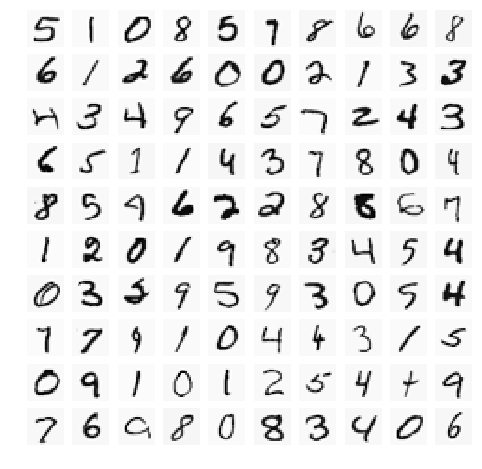

In [51]:
displayData(examples, nrow, ncol)

<b> 1.3 | Vectorizing Logistic Regression </b>

In [52]:
def sigmoid(Z):
    return (1/(1+np.exp(-Z)))

In [53]:
def lrCostFunction(theta,lmbda,X,Y):
    
    m = Y.shape[0]
    Z = X.dot(theta)
    H = sigmoid(Z)
    
    J = (1/m)*(-Y.T.dot(np.log(H))-(1-Y).T.dot(np.log(1-H))) + (lmbda/(2*m))*(np.sum(np.square(theta[1:])))

    return J

In [54]:
def lrgradientReg(theta,lmbda,X,Y):
    
    m = Y.shape[0]
    Z = X.dot(theta.reshape(-1,1))
    H = sigmoid(Z)
        
    grad = (1/m)*X.T.dot(H-Y) + (lmbda/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
    
    return grad.flatten()

In [55]:
#Test case for lrCostFunction
lmbda_t =3
theta_t = np.array((-2,-1,1,2))

X_t = np.array(((1.0,0.1,0.6,1.1),
                (1.0,0.2,0.7,1.2),
                (1.0,0.3,0.8,1.3),
                (1.0,0.4,0.9,1.4),
                (1.0,0.5,1.0,1.5)))

Y_t = np.array((1,0,1,0,1)).reshape(-1,1)

In [56]:
J_t = lrCostFunction(theta_t,lmbda_t,X_t,Y_t)
grad_t = lrgradientReg(theta_t,lmbda_t,X_t,Y_t)

print('Cost: ', J_t[0])
print('Expected cost: 2.534819')
print('Gradients: ',grad_t)
print('Expected gradients: [ 0.146561 -0.548558 0.724722 1.398003')

Cost:  2.534819396109744
Expected cost: 2.534819
Gradients:  [ 0.14656137 -0.54855841  0.72472227  1.39800296]
Expected gradients: [ 0.146561 -0.548558 0.724722 1.398003


<b>1.4.1 | One-vs-all Prediction </b>

In [57]:
def oneVsAll(X, Y, lmbda): 
    initial_theta = np.zeros((X.shape[1],1)) #401x1
    n_labels = len(np.unique(Y))
    
    all_theta = np.zeros((n_labels, X.shape[1])) #10x401
    
    for i in np.arange(1, n_labels + 1):
        fmin = minimize(lrCostFunction, x0=initial_theta, args=(lmbda, X, (Y == i)*1), \
                        method=None, jac=lrgradientReg, options={'maxiter': 50})
        all_theta[i-1] = fmin.x
    
    return all_theta

In [58]:
all_theta = oneVsAll(X,Y,0.1)

In [59]:
def predictOneVsAll(all_theta, X):
    return sigmoid(all_theta.dot(X.T)).T.argmax(axis=1) + 1

In [60]:
p = predictOneVsAll(all_theta, X)

print('Training Accuracy: {} %'.format(np.mean((p == Y.ravel()) * 100)))
print('Expected Training Accuracy: 94.9%')

Training Accuracy: 93.24 %
Expected Training Accuracy: 94.9%


<b>2 | Neural Networks</b>

In [61]:
def predict(theta1,theta2,X):
    z2 = X.dot(theta1.T)
    a2 = sigmoid(z2)

    a2 = np.column_stack((np.ones(X.shape[0]),a2))

    z3 = a2.dot(theta2.T)
    a3 = sigmoid(z3)
    
    return (np.argmax(a3, axis=1) +1)

In [62]:
p = predict(theta1,theta2,X)
print('Training Accuracy: {} %'.format(np.mean((p == Y.ravel()) * 100)))
print('Expected Training Accuracy: 97.5%')

Training Accuracy: 97.52 %
Expected Training Accuracy: 97.5%
